# Navier-Stokes with multiple bodies

In [2]:
using ViscousFlow

┌ Info: Recompiling stale cache file /Users/jeff/.julia/compiled/v1.1/ViscousFlow/2kdbn.ji for ViscousFlow [103da179-b3e4-57c1-99a4-586354eb2c5a]
└ @ Base loading.jl:1184


In [3]:
using Plots
pyplot()
clibrary(:colorbrewer)
default(grid = false)

### Set up basic free stream

Set the flow parameters

In [4]:
Re = 200; # Reynolds number
U = 1.0; # Free stream velocity
U∞ = (U,0.0);

### Set up the bodies, their initial configuration, and their motion

In [15]:
bl = BodyList()
tl = RigidTransform[]
ml = RigidBodyMotion[]

0-element Array{RigidBodyMotion,1}

#### Body 1

Set up points on the body. Here is a plate:

In [16]:
n = 51;
body1 = Plate(1.0,n)

Plate with 51 points and length 1.0 and thickness 0.0
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


set the initial configuration

In [17]:
let
    cent = (1.0,-1.0) #1.0+1.0im
    α = 0.0 #-π/3 #-π/4
    global T1 = RigidTransform(cent,α)
end
T1(body1) # transform the body to the current configuration

Plate with 51 points and length 1.0 and thickness 0.0
   Current position: (1.0,-1.0)
   Current angle (rad): 0.0


In [18]:
push!(tl,T1)

1-element Array{RigidTransform,1}:
 Rigid-body transform
  Translation: (1.0,-1.0)
  Rotation angle (rad): 0.0


Push this body onto the list

In [19]:
push!(bl,deepcopy(body1))

1-element Array{Body,1}:
 Plate with 51 points and length 1.0 and thickness 0.0
   Current position: (1.0,-1.0)
   Current angle (rad): 0.0


and set the motion

In [20]:
let a = 0.25, # location of pitch axis, a = 0.5 is leading edge
    ϕp = -π/2,  # phase lag of pitch
    ϕh = 0.0,  # phase lag of heave
    A = 0.25,  # amplitude/chord
    fstar = 1/π, # fc/U
    α₀ = 0, # mean angle of attack
    Δα = 10π/180, # amplitude of pitching
    U₀ = 0.0, # translational motion (set to zero in place of free stream)
    K = π*fstar # reduced frequency, K = πfc/U

    oscil1 = RigidBodyMotions.PitchHeave(U₀,a,K,ϕp,α₀,Δα,A,ϕh);
    global motion1 = RigidBodyMotion(oscil1)
end

Rigid Body Motion:
  ċ = 0.0 - 0.09im
  c̈ = 0.03 - 1.0im
  α̇ = 0.35
  α̈ = 0.0
  Oscillatory pitch-heave kinematics with
     Reduced frequency K = 1.0
     Heaving amplitude A = 0.25
     Pitching amplitude Δα = 0.17453292519943295
     Pitch lag ϕp = -1.5707963267948966
     Heave lag ϕh = 0.0


In [21]:
push!(ml,motion1)

1-element Array{RigidBodyMotion,1}:
 Rigid Body Motion:
  ċ = 0.0 - 0.09im
  c̈ = 0.03 - 1.0im
  α̇ = 0.35
  α̈ = 0.0
  Oscillatory pitch-heave kinematics with
     Reduced frequency K = 1.0
     Heaving amplitude A = 0.25
     Pitching amplitude Δα = 0.17453292519943295
     Pitch lag ϕp = -1.5707963267948966
     Heave lag ϕh = 0.0


#### Body 2

Let us also add a NACA 0012 airfoil

In [22]:
n = 50;
body2 = NACA4(0.0,0.0,0.12,np=n)

NACA 4-digit airfoil with 99 points and length 1.0 and thickness 0.12
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


In [23]:
let
    cent = (2.0,1.0)
    α = -π/4
    global T2 = RigidTransform(cent,α)
end
T2(body2) # transform the body to the current configuration

NACA 4-digit airfoil with 99 points and length 1.0 and thickness 0.12
   Current position: (2.0,1.0)
   Current angle (rad): -0.7853981633974483


In [24]:
push!(tl,T2)
#tl[2] = T2

2-element Array{RigidTransform,1}:
 Rigid-body transform
  Translation: (1.0,-1.0)
  Rotation angle (rad): 0.0
               
 Rigid-body transform
  Translation: (2.0,1.0)
  Rotation angle (rad): -0.7853981633974483


In [25]:
push!(bl,deepcopy(body2));

In [26]:
let a = 0.25, # location of pitch axis, a = 0.5 is leading edge
    ϕp = π/2,  # phase lag of pitch to heave
    ϕh = 0,  # phase lag of pitch to heave
    A = 0,  # amplitude/chord
    fstar = 1/π, # fc/U
    α₀ = 0, # mean angle of attack
    Δα = 0π/180, # amplitude of pitching
    U₀ = 0.0, # translational motion (set to zero in place of free stream)
    K = π*fstar # reduced frequency, K = πfc/U

    oscil1 = RigidBodyMotions.PitchHeave(U₀,a,K,ϕp,α₀,Δα,A,ϕh);
    global motion2 = RigidBodyMotion(oscil1)
end

Rigid Body Motion:
  ċ = 0.0 + 0.0im
  c̈ = 0.0 + 0.0im
  α̇ = 0.0
  α̈ = 0.0
  Oscillatory pitch-heave kinematics with
     Reduced frequency K = 1.0
     Heaving amplitude A = 0.0
     Pitching amplitude Δα = 0.0
     Pitch lag ϕp = 1.5707963267948966
     Heave lag ϕh = 0.0


In [27]:
push!(ml,motion2);
#ml[2] = motion2

#### Body 3

Let us also add another NACA 0012 airfoil

In [28]:
let
    cent = (0.0,1.0)
    α = -π/4
    global T3 = RigidTransform(cent,α)
end
T3(body2) # transform the body to the current configuration

NACA 4-digit airfoil with 99 points and length 1.0 and thickness 0.12
   Current position: (0.0,1.0)
   Current angle (rad): -0.7853981633974483


In [29]:
push!(tl,T3)

3-element Array{RigidTransform,1}:
 Rigid-body transform
  Translation: (1.0,-1.0)
  Rotation angle (rad): 0.0
               
 Rigid-body transform
  Translation: (2.0,1.0)
  Rotation angle (rad): -0.7853981633974483

 Rigid-body transform
  Translation: (0.0,1.0)
  Rotation angle (rad): -0.7853981633974483


In [30]:
push!(bl,deepcopy(body2))

3-element Array{Body,1}:
 Plate with 51 points and length 1.0 and thickness 0.0
   Current position: (1.0,-1.0)
   Current angle (rad): 0.0
                               
 NACA 4-digit airfoil with 99 points and length 1.0 and thickness 0.12
   Current position: (2.0,1.0)
   Current angle (rad): -0.7853981633974483

 NACA 4-digit airfoil with 99 points and length 1.0 and thickness 0.12
   Current position: (0.0,1.0)
   Current angle (rad): -0.7853981633974483


In [31]:
let a = 0.25, # location of pitch axis, a = 0.5 is leading edge
    ϕp = π/2,  # phase lag of pitch
    ϕh = 0,  # phase lag of pitch
    A = 0.5,  # amplitude/chord
    fstar = 1/π, # fc/U
    α₀ = 0, # mean angle of attack
    Δα = 30π/180, # amplitude of pitching
    U₀ = 0.0, # translational motion (set to zero in place of free stream)
    K = π*fstar # reduced frequency, K = πfc/U

    oscil1 = RigidBodyMotions.PitchHeave(U₀,a,K,ϕp,α₀,Δα,A,ϕh);
    global motion3 = RigidBodyMotion(oscil1)
end

Rigid Body Motion:
  ċ = 0.0 - 0.26im
  c̈ = 0.27 + 2.0im
  α̇ = 1.05
  α̈ = 0.0
  Oscillatory pitch-heave kinematics with
     Reduced frequency K = 1.0
     Heaving amplitude A = 0.5
     Pitching amplitude Δα = 0.5235987755982988
     Pitch lag ϕp = 1.5707963267948966
     Heave lag ϕh = 0.0


In [32]:
push!(ml,motion3);
#ml[3] = motion3

#### Plot the initial configuration of the bodies

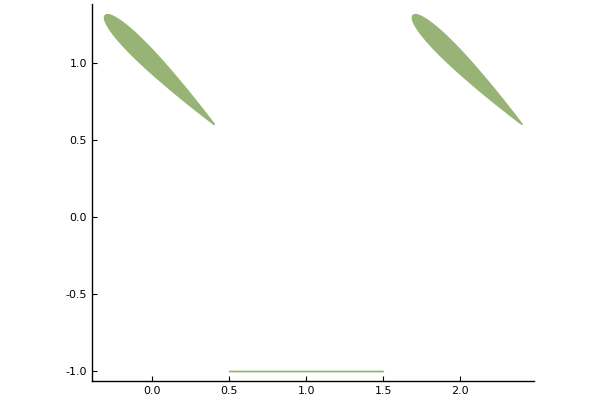

In [33]:
plot(bl)

#### Collect the inertial coordinates body Lagrange points into a single structure

In [34]:
numpts(bl)

249

In [35]:
X = VectorData(collect(bl));

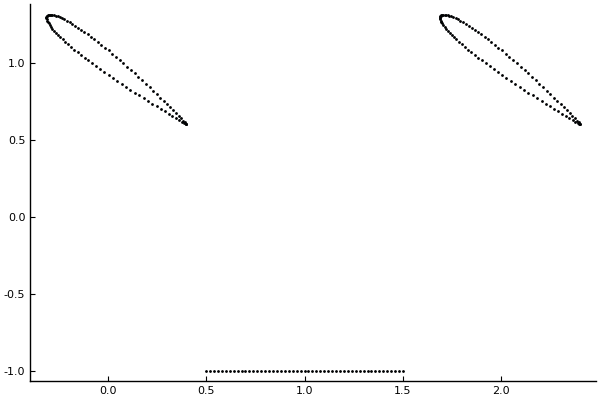

In [36]:
scatter(X.u,X.v,markersize=1,legend=:false)

#### We can use the `view` function to parse data structures into bodies

In [37]:
f = ScalarData(X)
fill!(f,1.0);

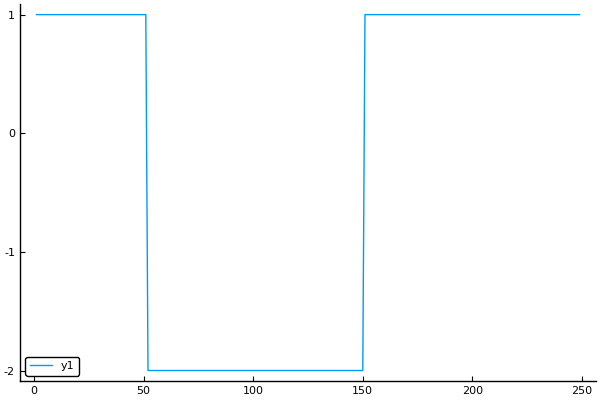

In [38]:
f2 = view(f,bl,2)
fill!(f2,-2.0)
plot(f)

In [39]:
V = VectorData(X)
assign_velocity!(V,X,bl,tl,ml,0.5)

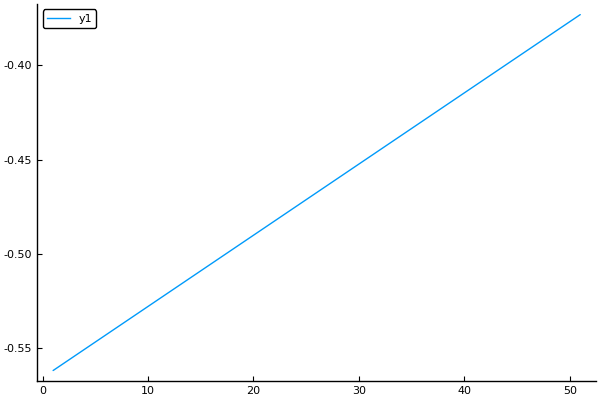

In [40]:
plot(view(V.v,bl,1))

#### Let's make a tool for visualizing the prescribed motion of the bodies
Note that this uses the Plots package.

In [41]:
function animate(bl::BodyList,ml::Vector{RigidBodyMotion},tl::Vector{RigidTransform};timestep=0.05,tfinal=1,kwargs...)
    length(bl) == length(ml) == length(tl) || error("Incorrect length of body list")
    
    bltmp = deepcopy(bl)
    
    r₁(u,t) = TimeMarching.r₁(u,t,ml)
    Δt = timestep
    stepper = TimeMarching.RK(u₀,Δt,r₁)

    u = vec(tl)
    t = 0.0
    anim = @animate for ti in Δt:Δt:tfinal
        t, u = stepper(t,u)
    
        for ib = 1:length(u)
            ui = u[ib]
            T = RigidTransform((ui[1],ui[2]),ui[3])
            T(bltmp[ib])
        end
        plot(bltmp;kwargs...)
        end
    return anim
    
end

animate (generic function with 1 method)

Set up the state vector:

In [42]:
u₀ = vec(tl)

([1.0, -1.0, 0.0], [2.0, 1.0, -0.785398], [0.0, 1.0, -0.785398])

In [43]:
vec(RigidTransform.(u₀))

([1.0, -1.0, 0.0], [2.0, 1.0, -0.785398], [0.0, 1.0, -0.785398])

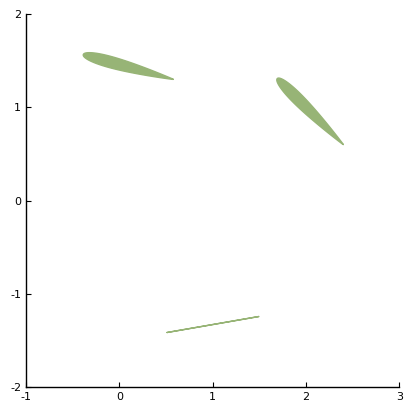

Animation("/var/folders/1s/lds3nd1s7xn4mgf0vxqwg0kr0000gn/T/tmpKNmKeG", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000071.png", "000072.png", "000073.png", "000074.png", "000075.png", "000076.png", "000077.png", "000078.png", "000079.png", "000080.png"])

In [44]:
anim = animate(bl,ml,tl,tfinal=4,xlim=(-1,3),ylim=(-2,2))

In [45]:
gif(anim, fps = 60)

┌ Info: Saved animation to 
│   fn = /Users/jeff/ViscousFlow/examples/tmp.gif
└ @ Plots /Users/jeff/.julia/packages/Plots/oiirH/src/animation.jl:90


Plots.AnimatedGif("/Users/jeff/ViscousFlow/examples/tmp.gif")

#### Set up the domain

In [46]:
xlim = (-1.0,3.0)
ylim = (-2.0,2.0)

(-2.0, 2.0)

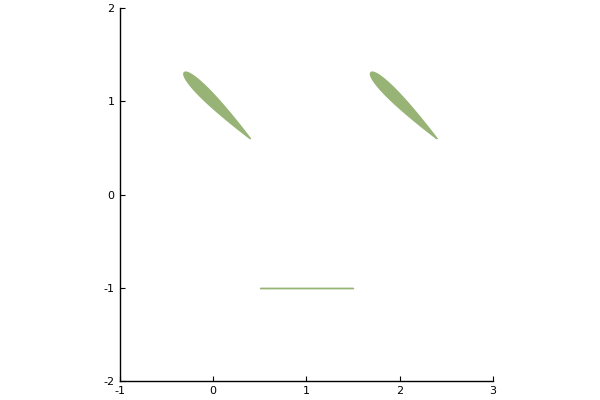

In [47]:
plot(bl,xlim=xlim,ylim=ylim)

#### Set the domain size and time step size

In [48]:
Δx = 0.0203;
Δt = min(0.5*Δx,0.5*Δx^2*Re);

### Now set up the system

Set up the state vector and constraint force vector for a static body

In [49]:
sys = NavierStokes(Re,Δx,xlim,ylim,Δt,U∞ = U∞, X̃ = X, isstore = true)

Navier-Stokes system on a grid of size 200 x 200

In [50]:
w₀ = Nodes(Dual,size(sys));
f = VectorData(X);
xg, yg = coordinates(w₀,dx=Δx,I0=Systems.origin(sys))

(-1.02515:0.0203:3.01455, -2.01985:0.0203:2.01985)

Set up the integrator here

In [51]:
plan_intfact(t,u) = Systems.plan_intfact(t,u,sys)
plan_constraints(u,t) = TimeMarching.plan_constraints(u,t,sys)
r₁(u,t) = TimeMarching.r₁(u,t,sys)
r₂(u,t) = TimeMarching.r₂(u,t,sys)


@time ifherk = IFHERK(w₀,f,sys.Δt,plan_intfact,plan_constraints,(r₁,r₂),rk=TimeMarching.RK31,isstored=true)

  8.918267 seconds (16.17 M allocations: 3.038 GiB, 8.53% gc time)


Order-3 IF-HERK integrator with
   State of type Nodes{Dual,200,200}
   Force of type VectorData{249}
   Time step size 0.01015


Initialize the state vector and the history vectors

In [79]:
t = 0.0
w₀ .= 0.0
u = deepcopy(w₀)

fx = [Float64[] for b in bl];
fy = [Float64[] for b in bl];
thist = Float64[];

uhist = [];
tsample = 0.2; # rate at which to store field data

### Advance the system!

Set the time range to integrate over.

In [80]:
tf = 1.0;
T = Δt:Δt:tf;

In [78]:
### NEED TO DEVELOP A SUMMATION FUNCTION THAT PARSES POINT DATA INTO BODIES...

In [62]:
Base.sum(f::AbstractVector,bl::BodyList,i::Int) = sum(view(f,bl,i))

In [81]:
for ti in T
    global t, u, f = ifherk(t,u)
    
    push!(thist,t)
    for i in length(bl)
        push!(fx[i],sum(f.u,bl,i)*Δx^2)
        push!(fy[i],sum(f.v,bl,i)*Δx^2)
    end
    #(isapprox(mod(t,tsample),0,atol=1e-6) || isapprox(mod(t,tsample),tsample,atol=1e-6)) ? push!(uhist,u) : nothing
    push!(uhist,u)
end
println("solution completed through time t = ",t)

solution completed through time t = 0.9946999999999994


In [82]:
fx

3-element Array{Array{Float64,1},1}:
 []                                                                                                                                                                                                    
 []                                                                                                                                                                                                    
 [-58.72, 1.05445, 1.02983, 0.998025, 0.968784, 0.945533, 0.928419, 0.916421, 0.908245, 0.902691  …  0.938778, 0.939263, 0.939518, 0.939552, 0.939378, 0.939009, 0.938459, 0.937744, 0.93688, 0.935885]

#### Plotting

Basic plot

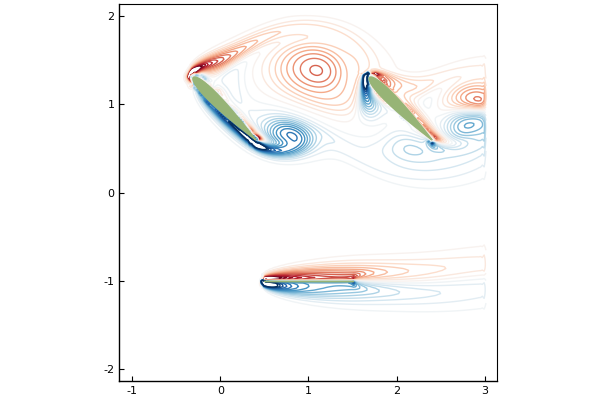

In [57]:
plot(xg,yg,uhist[end],levels=range(-0.25,stop=0.25,length=30), color = :RdBu,clim=(-0.25,0.25))
plot!(bl)

Make a movie

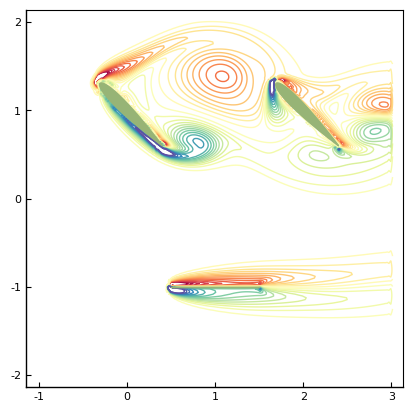

┌ Info: Saved animation to 
│   fn = /Users/jeff/ViscousFlow/examples/tmp.gif
└ @ Plots /Users/jeff/.julia/packages/Plots/oiirH/src/animation.jl:90


Plots.AnimatedGif("/Users/jeff/ViscousFlow/examples/tmp.gif")

In [58]:
@gif for i = 1:10:length(uhist)
    plot(xg,yg,uhist[i],levels=range(-0.25,stop=0.25,length=30),clim=(-0.25,0.25))
    plot!(bl)
end

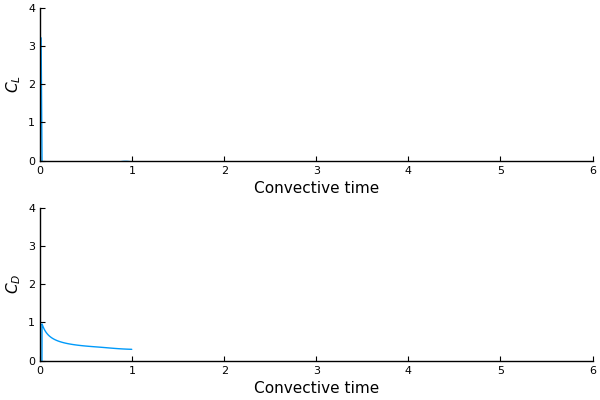

In [66]:
plt = plot(layout = (2,1), size = (600, 400))
plot!(plt[1],thist,2*fy,xlim=(0,6),ylim=(0,4),xlabel="Convective time",ylabel="\$C_L\$",legend=false)
plot!(plt[2],thist,2*fx,xlim=(0,6),ylim=(0,4),xlabel="Convective time",ylabel="\$C_D\$",legend=false)
plt

In [183]:
xg,yg = coordinates(u,dx=Δx,I0=Systems.origin(sys))
ψ = deepcopy(uhist[end])
ψ .= -(sys.L\uhist[end])*Δx .+ yg';

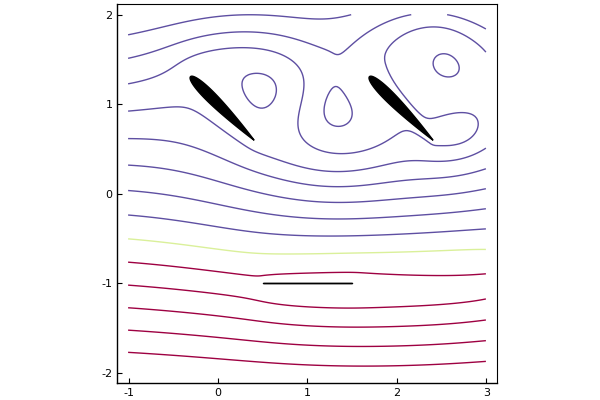

In [184]:
plot(xg,yg,ψ,trim=1,clim=(-0.1,0.1))
plot!(bl,fillcolor=:black,linecolor=:black)